# Trabajo Final - Macroeconomía con Python
## Alumno: Alexander Max Tello Fuentes
## Código: 20156122

## Pregunta 2

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
!pip install pandas-datareader
import pandas_datareader.data as web
import datetime as dt

In [4]:
start = dt.datetime(1990,1,1)
end   = dt.datetime(2018,12,31)
GDP   = web.DataReader('GDPC1', 'fred', start=start, end=end)['GDPC1'] #Traemos la data de forma remota
ly    = np.log(GDP) #Logaritmo del PBI en niveles
cycle, trend = sm.tsa.filters.hpfilter(ly, 1600) #Utilizamos el filtro HP para descomponerlo en log-ciclo y log-tendencia
bdp=(ly-trend)*100 #calculamos la brecha de producto
gdpdf = pd.concat([ly, trend, bdp],axis=1).dropna(axis=0)
gdpdf.columns = ['log-level', 'Tendencia', 'Brecha de Producto']
gdpdf.index = pd.DatetimeIndex(gdpdf.index.values,freq=gdpdf.index.inferred_freq)
print('-'*50)
print('GDP')
print(gdpdf.head())


start1 = dt.datetime(1989,1,1)
end1   = dt.datetime(2018,12,31)
ipc = web.DataReader('CPIAUCSL', 'fred', start1, end1) # Descarga IPC
ipc = ipc.resample('Q').mean() # De mensual a trimestral
lipc = np.log(ipc) #IPC en log niveles
yipc = np.log(ipc/ipc.shift(4))*100# Tasa de crecimiento de 4 trimestres
ipc = yipc-2 # Tasa de crecimiento de 4 trimestres-2
ipc = ipc.dropna(axis=0) # Eliminar NaNs
ipcdf = pd.concat([lipc, yipc, ipc],axis=1).dropna(axis=0)
ipcdf.columns = ['log-level', 'Inflación anual' ,'Desv. de la Inf']
ipcdf.index = pd.DatetimeIndex(ipcdf.index.values,freq=ipcdf.index.inferred_freq)
print('-'*50)
print('IPC')
print(ipcdf.head())

--------------------------------------------------
GDP
            log-level  Tendencia  Brecha de Producto
1990-01-01   9.144018   9.121911            2.210681
1990-04-01   9.147640   9.127687            1.995292
1990-07-01   9.148305   9.133478            1.482772
1990-10-01   9.139160   9.139308           -0.014808
1991-01-01   9.134470   9.145214           -1.074347
--------------------------------------------------
IPC
            log-level  Inflación anual  Desv. de la Inf
1990-03-31   4.852291         5.100558         3.100558
1990-06-30   4.862135         4.481509         2.481509
1990-09-30   4.879260         5.415170         3.415170
1990-12-31   4.896097         6.087384         4.087384
1991-03-31   4.903545         5.125424         3.125424


Dibujamos el PBI superpuesto a su log tendencia, y en otro gráfico mostramos el desvío de la inflación.

<function matplotlib.pyplot.show(*args, **kw)>

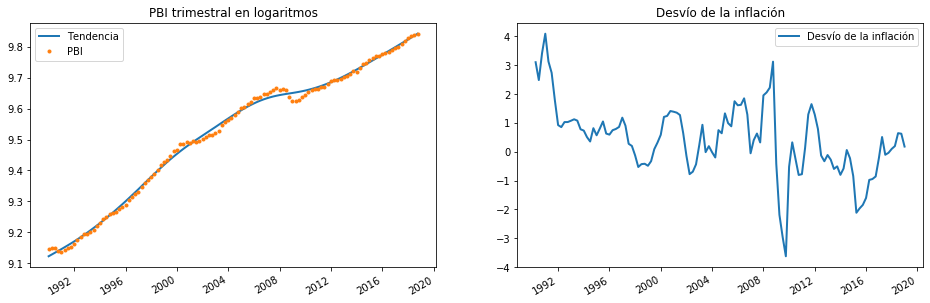

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
ax = axes[0]
ax.plot(trend, '-',linewidth=2,label='Tendencia')
fig.autofmt_xdate()
ax.plot(ly, '.',linewidth=2,label='PBI')
fig.autofmt_xdate()
ax.set_title("PBI trimestral en logaritmos")
ax.legend(loc='best')
ax = axes[1]
ax.plot(ipc, '-',linewidth=2,label='Desvío de la inflación')
fig.autofmt_xdate()
ax.set_title("Desvío de la inflación")
ax.legend(loc='best')
plt.show

Construimos un marco de datos con la brecha de producto y el desvío de la inflación. 

In [6]:
df = pd.concat([bdp.reset_index(drop=True), ipc.reset_index(drop=True)],axis=1).dropna(axis=0) #concatenamos eliminando los index
df.columns = ['Brecha de producto', 'Desv. de la Inf']
df.index = pd.DatetimeIndex(gdpdf.index.values,freq=gdpdf.index.inferred_freq)#Asignamos un nuevo index (usamos el index del gdp)
print('-'*50)
print('Nuevo Marco de datos')
print('-'*50)
print(df.head())
print(df.shape)

--------------------------------------------------
Nuevo Marco de datos
--------------------------------------------------
            Brecha de producto  Desv. de la Inf
1990-01-01            2.210681         3.100558
1990-04-01            1.995292         2.481509
1990-07-01            1.482772         3.415170
1990-10-01           -0.014808         4.087384
1991-01-01           -1.074347         3.125424
(116, 2)


<Figure size 432x288 with 0 Axes>

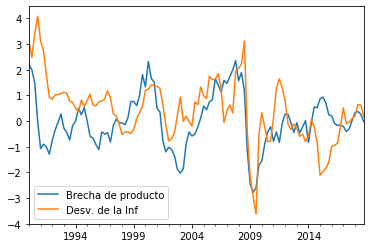

In [7]:
plt.figure()
df.plot()
plt.legend(loc='best')

Ahora separamos el nuevo marco de datos "df" en submuestras de los periodos precrisis, crisis y postcrisis.

In [8]:
pre=df.iloc[59:75] #Desde el cuarto trimestre del 2004 hasta el tercer trimestre del 2008
crisis=df.iloc[75:98] #Desde el cuarto trimestre del 2008 hasta el segundo trimestre del 2014
post=df.iloc[98:116] #Desde el tercer trimestre del 2014 hasta el cuarto trimestre del 2018
print(pre.head())
print(crisis.head())
print(post.head())

            Brecha de producto  Desv. de la Inf
2004-10-01            0.114328         1.328919
2005-01-01            0.584972         0.990022
2005-04-01            0.440104         0.881037
2005-07-01            0.750804         1.748604
2005-10-01            0.835819         1.608771
            Brecha de producto  Desv. de la Inf
2008-10-01           -1.170948        -0.416796
2009-01-01           -2.463195        -2.184407
2009-04-01           -2.778172        -2.946606
2009-07-01           -2.599708        -3.620008
2009-10-01           -1.711086        -0.523301
            Brecha de producto  Desv. de la Inf
2014-07-01            0.555160        -0.224879
2014-10-01            0.521311        -0.842717
2015-01-01            0.865965        -2.112957
2015-04-01            0.936923        -1.962997
2015-07-01            0.693211        -1.841515


Text(0.5, 1.0, 'Consecuencias macroeconómicas de la crisis subprime')

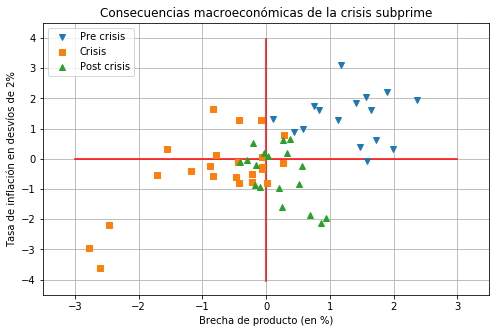

In [9]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.axvline(x=0, ymin=.05, ymax=.94, color = 'r')  # Dibujamos una línea vertical roja centrada en x = 0
plt.axhline(y=0, xmin=.0714, xmax=.9285, color = 'r')  # Dibujamos una línea horizontal roja centrada en y = 0
ax.plot(pre['Brecha de producto'], pre['Desv. de la Inf'], 'v',label="Pre crisis")
ax.plot(crisis['Brecha de producto'], crisis['Desv. de la Inf'], 's',label="Crisis")
ax.plot(post['Brecha de producto'], post['Desv. de la Inf'], '^',label="Post crisis")
plt.grid(True)

ax.legend(loc='upper left')
plt.xlabel("Brecha de producto (en %)")
plt.ylabel("Tasa de inflación en desvíos de 2%")
ax.set_title("Consecuencias macroeconómicas de la crisis subprime")